In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('data/StudentPerformanceFactors.csv')

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
results = pd.DataFrame(columns=[
    'Predictor', 'Correlation', 'P-value', 'R-squared', 'Adj_R-squared', 'VIF', 
    'T-statistic', 'F-statistic', 
    'ANOVA_Type1_F', 'ANOVA_Type1_P', 
    'ANOVA_Type2_F', 'ANOVA_Type2_P', 
    'ANOVA_Type3_F', 'ANOVA_Type3_P'
])

for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    # OLS
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    
    # Correlation
    correlation = pd.Series(X_scaled[:, i]).corr(y)
    
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()

    # ANOVA
    anova_type1 = anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    
    anova_type2 = anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    
    anova_type3 = anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'Correlation': [correlation],  # Correlation is now in the second column
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'ANOVA_Type1_F': [anova_type1_f],
        'ANOVA_Type1_P': [anova_type1_p],
        'ANOVA_Type2_F': [anova_type2_f],
        'ANOVA_Type2_P': [anova_type2_p],
        'ANOVA_Type3_F': [anova_type3_f],
        'ANOVA_Type3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

# Sort the results
results_sorted = results.sort_values(by='Adj_R-squared', ascending=False)
results_sorted


,Predictor,Correlation,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,ANOVA_Type1_F,ANOVA_Type1_P,ANOVA_Type2_F,ANOVA_Type2_P,ANOVA_Type3_F,ANOVA_Type3_P
1,Attendance,0.581072,0.000000e+00,0.337645,0.337544,1.005639,58.025740,3366.986498,3366.986498,0.000000e+00,3366.986498,0.000000e+00,3.579309e+04,0.0
0,Hours_Studied,0.445455,0.000000e+00,0.198430,0.198309,1.002895,40.436123,1635.080039,1635.080039,1.286349e-319,1635.080039,1.286349e-319,1.696789e+05,0.0
3,Previous_Scores,0.175079,1.244380e-46,0.030653,0.030506,1.006318,14.452101,208.863214,208.863214,1.244380e-46,208.863214,1.244380e-46,6.479558e+04,0.0
4,Tutoring_Sessions,0.156525,1.650817e-37,0.024500,0.024352,1.002123,12.879738,165.887652,165.887652,1.650817e-37,165.887652,1.650817e-37,7.997823e+05,0.0
8,Access_to_Resources_Low,-0.132155,3.952846e-27,0.017465,0.017316,1.339404,-10.835388,117.405623,117.405623,3.952846e-27,117.405623,3.952846e-27,1.621324e+06,0.0
6,Parental_Involvement_Low,-0.113602,2.001724e-20,0.012906,0.012756,1.363863,-9.292759,86.355371,86.355371,2.001724e-20,86.355371,2.001724e-20,1.604927e+06,0.0
23,Parental_Education_Level_Postgraduate,0.093764,2.225974e-14,0.008792,0.008642,1.310914,7.654032,58.584203,58.584203,2.225974e-14,58.584203,2.225974e-14,1.588790e+06,0.0
22,Parental_Education_Level_High_School,-0.085818,2.805507e-12,0.007365,0.007214,1.312032,-7.000335,49.004685,49.004685,2.805507e-12,49.004685,2.805507e-12,1.027950e+06,0.0
21,Learning_Disabilities_Yes,-0.085066,4.338624e-12,0.007236,0.007086,1.002828,-6.938544,48.143389,48.143389,4.338624e-12,48.143389,4.338624e-12,1.784373e+06,0.0
25,Distance_from_Home_Near,0.084870,4.858410e-12,0.007203,0.007053,2.627725,6.922421,47.919911,47.919911,4.858410e-12,47.919911,4.858410e-12,8.094888e+05,0.0


In [5]:
selected_predictors = [
    'Attendance', 
    'Hours_Studied', 
    'Previous_Scores', 
    'Tutoring_Sessions', 
    'Access_to_Resources_Low', 
    'Parental_Involvement_Low'
]

X = df_encoded[selected_predictors]
y = df_encoded['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)  # Add the intercept
model = sm.OLS(y_train, X_train_scaled).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1233.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:45:04   Log-Likelihood:                -10721.
No. Observations:                4624   AIC:                         2.146e+04
Df Residuals:                    4617   BIC:                         2.150e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2368      0.036   1858.359      0.0

In [9]:
X_test_scaled = sm.add_constant(X_test_scaled)  
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on the test set: {mse}')


Mean Squared Error on the test set: 4.280216303056111


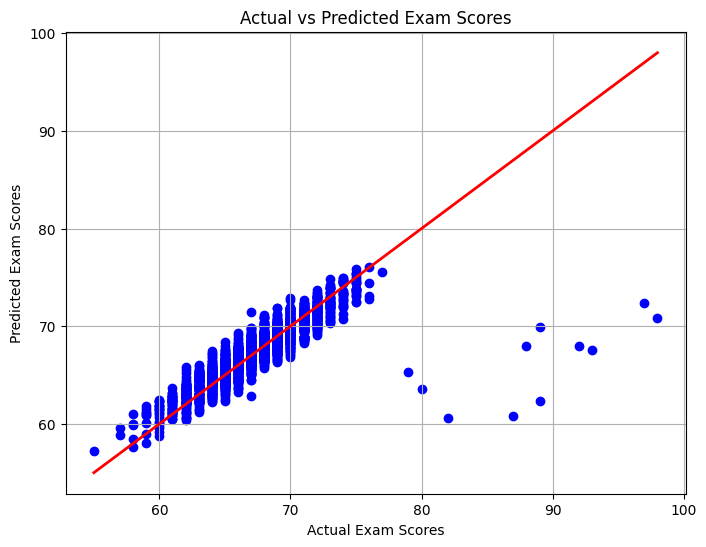

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores')
plt.grid(True)
plt.show()

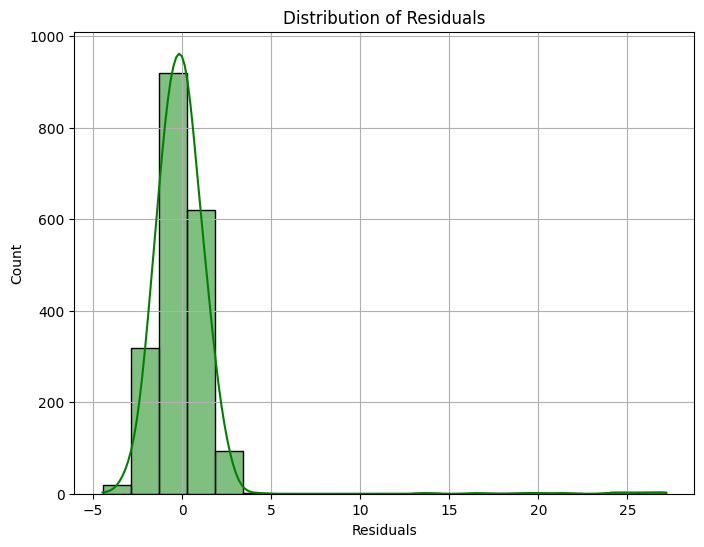

In [8]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='green', bins=20)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

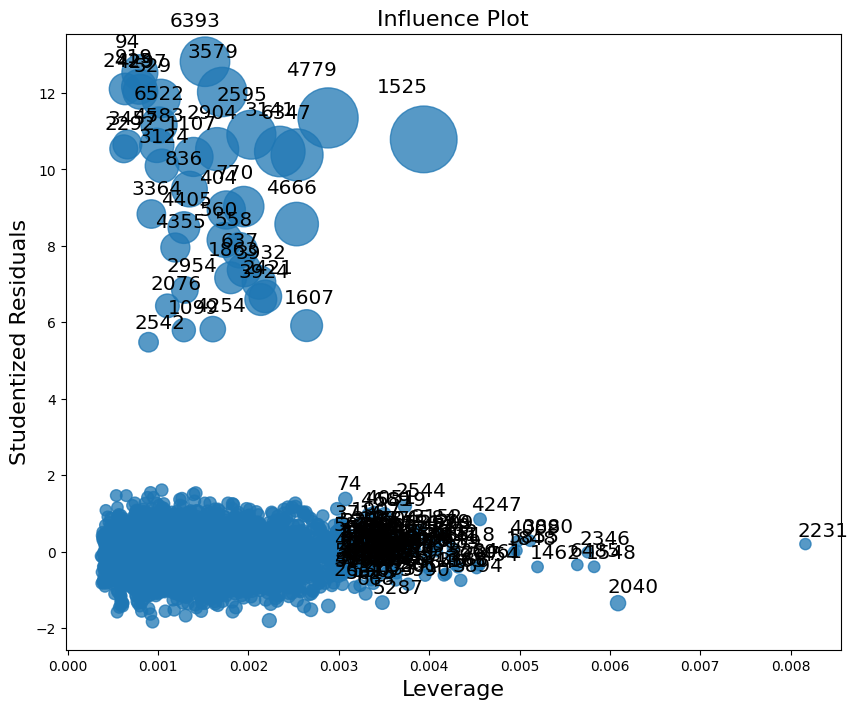

In [10]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot

fig, ax = plt.subplots(figsize=(10, 8))
influence_plot(model, ax=ax, criterion="cooks")

plt.show()

Original Model Summary
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1920.
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:49:15   Log-Likelihood:                -15014.
No. Observations:                6607   AIC:                         3.004e+04
Df Residuals:                    6600   BIC:                         3.009e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2357      0.

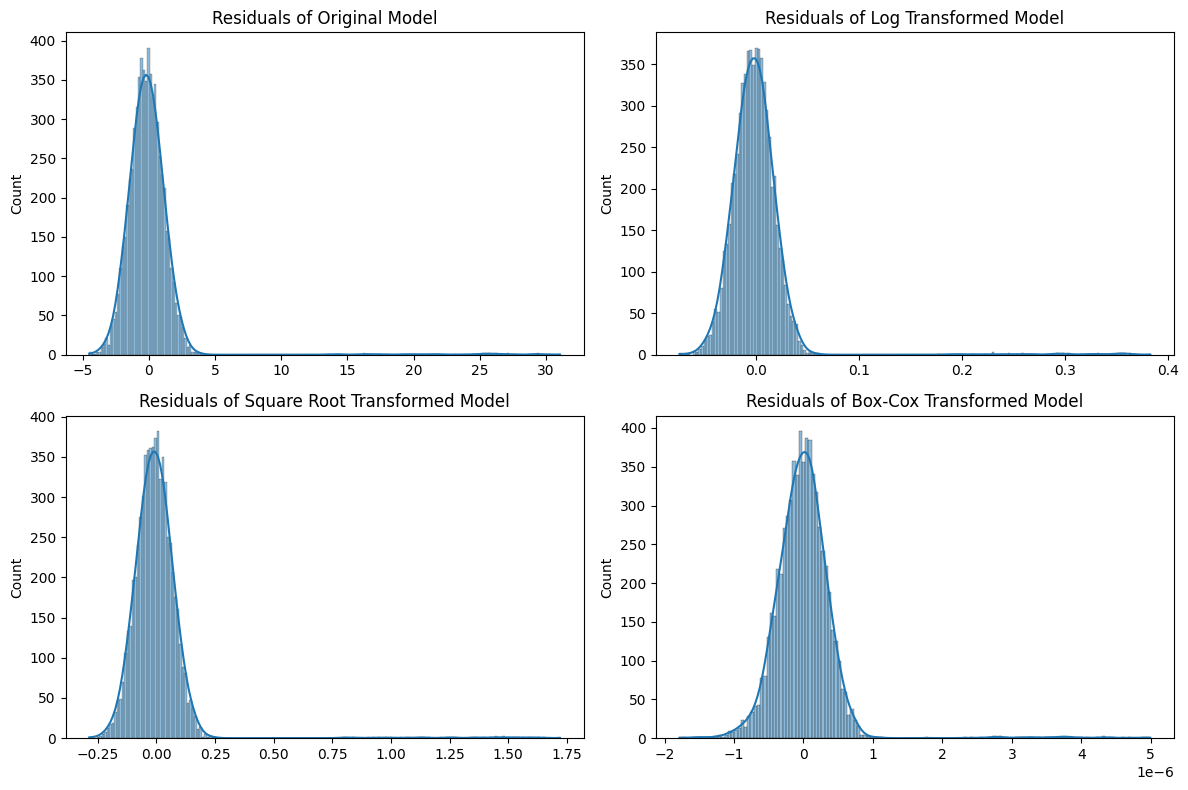

In [11]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/StudentPerformanceFactors.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define predictors and target
predictors = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 
              'Access_to_Resources_Low', 'Parental_Involvement_Low']
X = df_encoded[predictors]
y = df_encoded['Exam_Score']

# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Original model without transformation
X_const = sm.add_constant(X_scaled)
model_orig = sm.OLS(y, X_const).fit()
print("Original Model Summary")
print(model_orig.summary())

# Log transformation of the target variable (Exam_Score)
y_log = np.log(y)
model_log = sm.OLS(y_log, X_const).fit()
print("\nLog Transformation Model Summary")
print(model_log.summary())

# Square root transformation of the target variable
y_sqrt = np.sqrt(y)
model_sqrt = sm.OLS(y_sqrt, X_const).fit()
print("\nSquare Root Transformation Model Summary")
print(model_sqrt.summary())

# Box-Cox transformation (only works with positive values)
# Fitting and transforming y using the Box-Cox transformation
y_boxcox, fitted_lambda = stats.boxcox(y)
model_boxcox = sm.OLS(y_boxcox, X_const).fit()
print("\nBox-Cox Transformation Model Summary")
print(f"Lambda used for Box-Cox Transformation: {fitted_lambda}")
print(model_boxcox.summary())

# Compare residuals of different models
plt.figure(figsize=(12, 8))

# Original residuals
plt.subplot(2, 2, 1)
sns.histplot(model_orig.resid, kde=True)
plt.title('Residuals of Original Model')

# Log transformation residuals
plt.subplot(2, 2, 2)
sns.histplot(model_log.resid, kde=True)
plt.title('Residuals of Log Transformed Model')

# Square root transformation residuals
plt.subplot(2, 2, 3)
sns.histplot(model_sqrt.resid, kde=True)
plt.title('Residuals of Square Root Transformed Model')

# Box-Cox transformation residuals
plt.subplot(2, 2, 4)
sns.histplot(model_boxcox.resid, kde=True)
plt.title('Residuals of Box-Cox Transformed Model')

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
df = pd.read_csv('data/StudentPerformanceFactors.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define predictors and target
predictors = ['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions', 
              'Access_to_Resources_Low', 'Parental_Involvement_Low']
X = df_encoded[predictors]
y = df_encoded['Exam_Score']

# Apply Log Transformation to selected predictors
X_transformed = X.copy()
X_transformed['Attendance'] = np.log(X_transformed['Attendance'] + 1)  # log(0) issue avoided by adding 1
X_transformed['Hours_Studied'] = np.log(X_transformed['Hours_Studied'] + 1)

# Optionally apply Polynomial Transformation (second-degree polynomial)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Add constant for intercept
X_const = sm.add_constant(X_scaled)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Print summary of the transformed model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     461.9
Date:                Mon, 30 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:52:15   Log-Likelihood:                -15003.
No. Observations:                6607   AIC:                         3.006e+04
Df Residuals:                    6581   BIC:                         3.023e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.2357      0.029   2327.061      0.0

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('data/StudentPerformanceFactors.csv')

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Apply log transformation to continuous variables (example)
continuous_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
df[continuous_vars] = df[continuous_vars].apply(lambda x: np.log1p(x))  # log1p to handle zeros

# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')


# Define the target and predictors
X = df_encoded.drop('Exam_Score', axis=1)
y = df_encoded['Exam_Score']

# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an empty dataframe to store results
results = pd.DataFrame(columns=[
    'Predictor', 'Correlation', 'P-value', 'R-squared', 'Adj_R-squared', 
    'VIF', 'T-statistic', 'F-statistic', 'ANOVA_Type1_F', 'ANOVA_Type1_P', 
    'ANOVA_Type2_F', 'ANOVA_Type2_P', 'ANOVA_Type3_F', 'ANOVA_Type3_P'
])

# Loop through each predictor for regression and ANOVA
for i, predictor in enumerate(X.columns):
    X_i = sm.add_constant(X_scaled[:, i])
    model = sm.OLS(y, X_i).fit()
    
    # OLS results
    p_value = model.pvalues.iloc[1]
    rsq = model.rsquared
    adj_rsq = model.rsquared_adj
    t_statistic = model.tvalues.iloc[1]
    f_statistic = model.fvalue
    vif = variance_inflation_factor(X_scaled, i)
    
    # Correlation
    correlation = np.corrcoef(X_scaled[:, i], y)[0, 1]
    
    # ANOVA analysis
    formula = f'Exam_Score ~ {predictor}'
    model_anova = smf.ols(formula, data=df_encoded).fit()
    
    anova_type1 = sm.stats.anova_lm(model_anova, typ=1)
    anova_type1_f = anova_type1['F'].iloc[0]
    anova_type1_p = anova_type1['PR(>F)'].iloc[0]
    
    anova_type2 = sm.stats.anova_lm(model_anova, typ=2)
    anova_type2_f = anova_type2['F'].iloc[0]
    anova_type2_p = anova_type2['PR(>F)'].iloc[0]
    
    anova_type3 = sm.stats.anova_lm(model_anova, typ=3)
    anova_type3_f = anova_type3['F'].iloc[0]
    anova_type3_p = anova_type3['PR(>F)'].iloc[0]
    
    current_results = pd.DataFrame({
        'Predictor': [predictor],
        'Correlation': [correlation],
        'P-value': [p_value],
        'R-squared': [rsq],
        'Adj_R-squared': [adj_rsq],
        'VIF': [vif],
        'T-statistic': [t_statistic],
        'F-statistic': [f_statistic],
        'ANOVA_Type1_F': [anova_type1_f],
        'ANOVA_Type1_P': [anova_type1_p],
        'ANOVA_Type2_F': [anova_type2_f],
        'ANOVA_Type2_P': [anova_type2_p],
        'ANOVA_Type3_F': [anova_type3_f],
        'ANOVA_Type3_P': [anova_type3_p]
    })

    current_results = current_results.dropna(how='all', axis=1)
    results = pd.concat([results, current_results], ignore_index=True)

# Sort the results
results_sorted = results.sort_values(by='Adj_R-squared', ascending=False)

# Display the sorted results
results_sorted

,Predictor,Correlation,P-value,R-squared,Adj_R-squared,VIF,T-statistic,F-statistic,ANOVA_Type1_F,ANOVA_Type1_P,ANOVA_Type2_F,ANOVA_Type2_P,ANOVA_Type3_F,ANOVA_Type3_P
1,Attendance,0.580865,0.000000e+00,0.337404,0.337303,1.005581,57.994488,3363.360681,3363.360681,0.000000e+00,3363.360681,0.000000e+00,1.200872e+00,0.273187
0,Hours_Studied,0.422919,5.340994e-285,0.178860,0.178736,1.002629,37.930185,1438.698925,1438.698925,5.340994e-285,1438.698925,5.340994e-285,1.727613e+04,0.000000
3,Previous_Scores,0.173051,1.393420e-45,0.029947,0.029800,1.006028,14.279518,203.904625,203.904625,1.393420e-45,203.904625,1.393420e-45,2.494930e+03,0.000000
4,Tutoring_Sessions,0.150306,1.090993e-34,0.022592,0.022444,1.001813,12.355943,152.669328,152.669328,1.090993e-34,152.669328,1.090993e-34,5.912840e+05,0.000000
8,Access_to_Resources_Low,-0.132155,3.952846e-27,0.017465,0.017316,1.339443,-10.835388,117.405623,117.405623,3.952846e-27,117.405623,3.952846e-27,1.621324e+06,0.000000
6,Parental_Involvement_Low,-0.113602,2.001724e-20,0.012906,0.012756,1.364009,-9.292759,86.355371,86.355371,2.001724e-20,86.355371,2.001724e-20,1.604927e+06,0.000000
23,Parental_Education_Level_Postgraduate,0.093764,2.225974e-14,0.008792,0.008642,1.310972,7.654032,58.584203,58.584203,2.225974e-14,58.584203,2.225974e-14,1.588790e+06,0.000000
22,Parental_Education_Level_High_School,-0.085818,2.805507e-12,0.007365,0.007214,1.311985,-7.000335,49.004685,49.004685,2.805507e-12,49.004685,2.805507e-12,1.027950e+06,0.000000
21,Learning_Disabilities_Yes,-0.085066,4.338624e-12,0.007236,0.007086,1.002505,-6.938544,48.143389,48.143389,4.338624e-12,48.143389,4.338624e-12,1.784373e+06,0.000000
25,Distance_from_Home_Near,0.084870,4.858410e-12,0.007203,0.007053,2.627337,6.922421,47.919911,47.919911,4.858410e-12,47.919911,4.858410e-12,8.094888e+05,0.000000
